**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.


# 16: Regresión Logística

El modelo de RL corresponde a un modelo supervisado para clasificaciones.

In [1]:
import numpy as np
import pandas as pd
#import warnings
#warnings.simplefilter("ignore")

En este caso se van a utilizar los datos de la base de datos de torrenicalidad, donde la variable objetivo es 1 o 0, que corresponde a si la cuenca es torrencial o no, respectivamente.

In [4]:
df= pd.read_excel('G:\My Drive\CATEDRA\MACHINE LEARNING\datos\Cuencas_torrencialidad.xlsx', sheet_name='Hoja2')
print(df.shape)
X=np.array(df.drop(['Flash flood record', 'Name','Cuenca'],axis=1))
y=np.array(df['Flash flood record'])

(73, 32)


## Statsmodels

Al igual que en el caso de modelos lineales, una buena opción es la librería statsmodels, ya que arroja la hoja de resultados con diferentes métricas que permiten conocer los resultados directamente.

In [ ]:
import statsmodels.api as sm
model1=sm.Logit(y,X)
result1=model1.fit(method='nm')
print(result1.summary())

Para obtener los pesos de las variables o coeficientes, se puede utilizar también la siguiente función.

In [ ]:
result1.params

Existen diferentes métodos para resolver el problema de regresión, por lo tanto se puede modificar dicho argumento.

In [30]:
result1=model1.fit(method='bfgs')
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 33
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   73
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                           27
Date:                Fri, 06 Dec 2019   Pseudo R-squ.:                   1.000
Time:                        15:52:12   Log-Likelihood:            -2.5904e-06
converged:                       True   LL-Null:                       -49.768
Covariance Type:            nonrobust   LLR p-value:                 3.068e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1552        nan      

También el argumento de máximas interacciones.

In [32]:
result1=model1.fit(maxiter=50)
print(result1.summary())

         Current function value: 0.000000
         Iterations: 50
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   73
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                           27
Date:                Fri, 06 Dec 2019   Pseudo R-squ.:                   1.000
Time:                        15:57:10   Log-Likelihood:            -1.6717e-05
converged:                      False   LL-Null:                       -49.768
Covariance Type:            nonrobust   LLR p-value:                 3.068e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5835   5.83e+08      1e-09      1.000   -1.14e+09    1.14e+09
x2             0.1690   9.58e+06   1.76e-08      1.000   -1.88e+0

En el siguiente link se pueden consultar las diferentes argumentos y opciones de la función RL en statsmodels.

https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.fit.html#statsmodels.api.Logit.fit

## Sklearn

La librería de Sklearn es mas ágil en resolver los problemas de RL. Como hiperparámetro utiliza el C, el cual regulariza los coeficientes, de forma similar a LASSO, pero de forma 1/C. Es por esto que no se obtienen coeficientes similares que para Statsmodels, se pueden aproximar asignando un valor para regularizar muy bajo y con intercepto 0 de la siguiente forma.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=False, C=1e30)

En el siguiente link se pueden conocer los diferentes argumentos de la función RL en Sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Luego de instanciar el modelo se ajusta a los datos y se pueden obtener tanto los coeficientes como el intercepto.

In [55]:
model2=model.fit(X,y)
model2.coef_

array([[ 0.52537955,  0.19354906, -0.21633247, -0.85129018,  0.35002608,
         0.46194467, -0.58862276,  1.75394728,  0.07494584, -0.17569829,
        -0.08465279,  0.03639248,  0.15434388,  0.70966486,  0.04038649,
         0.2227852 ,  0.23363954,  0.02050789,  0.3737952 ,  0.92456445,
        -0.14385653,  0.92093978,  0.46228222, -0.88069803,  0.31697202,
         0.27257384, -1.13627211,  1.28170646,  8.57955034]])

In [56]:
model2.intercept_

0.0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y)

A continuación se evaluán algunas de las métricas ya estudiadas en otros talleres.

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)
print(classification_report(y_test,model2.predict(X_test)))

Precision en entrenamiento: 1.0
Precision en validacion: 1.0


El método de RL puede arrojar valores categóricos en la predicción, en este caso 0 y 1, o probabilidades para cada caso, de la siguiente forma.

In [66]:
predictions = model2.predict(X_test)
probabilities = model2.predict_proba(X_test)[:, 1]
predictions,probabilities

El método de partición *cross validation* se puede utilizar de la siguiente manera:

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(model, X, y, cv=kfold)
print('Valor medio:',results.mean())
print('Desviacion estandar:',results.std())

Valor medio: 0.919047619047619
Desviacion estandar: 0.09786843869459148


El MLE es Maximum Likelihood Estimation que estima la máxima probabilidad y asume a *joint probablity mass function*, mientras el OLS es un método que aproxima minimizando las distancias y no requiere ninguna hipótesis estocástica.

In [91]:
probability = model.predict_proba(X_test)[:, 1]
log_odds = model.decision_function(X_test)
classes = model.predict(X_test)

In [92]:
odds_ratio = np.exp(log_odds)
probability_manual = odds_ratio / (1 + odds_ratio)

# Para chequear si ambos son iguales
np.allclose(probability, probability_manual)

True

In [72]:
probability_manual = 1 / (1 + np.exp(-log_odds))

# Para chequear si ambos son iguales
np.allclose(probability, probability_manual)

True

A continuación se grafican las relaciones entre estos valores obtenidos.

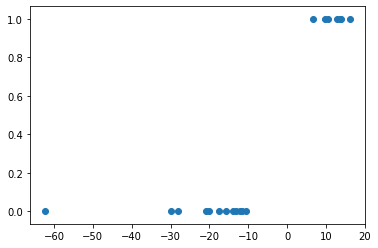

In [87]:
import matplotlib.pyplot as plt
plt.scatter(log_odds, probability);

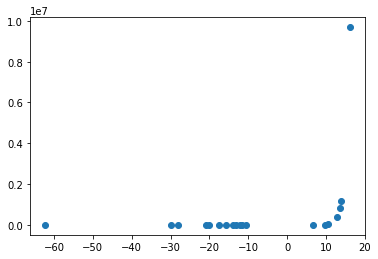

In [83]:
plt.scatter(log_odds, odds_ratio);

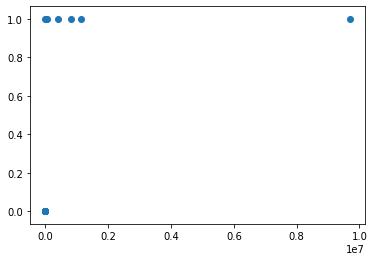

In [84]:
plt.scatter(odds_ratio,probability);

Finalmente, y para este caso de pocos valores, se puede observar los resultados de la siguiente forma.

In [93]:
df = pd.DataFrame(dict(probability=probability, log_odds=log_odds, classes=classes))
df.sort_values('probability')

,probability,log_odds,classes
9,9.374744e-28,-62.234363,0
2,1.083201e-13,-29.853686,0
15,6.879915e-13,-28.005000,0
6,8.871770e-10,-20.842977,0
11,1.762905e-09,-20.156303,0
3,2.253783e-08,-17.608070,0
14,1.572352e-07,-15.665523,0
4,8.882037e-07,-13.934064,0
1,1.717688e-06,-13.274530,0
17,4.936285e-06,-12.218893,0
